In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # scaling transform
from sklearn.metrics import accuracy_score, zero_one_loss
import warnings
warnings.filterwarnings("ignore")


# EXPLORATION

In [84]:
tr = pd.read_csv("./train.csv")
val_X = pd.read_csv("./test.csv")
val_Y = pd.read_csv("./test_labels.csv")



In [85]:
tr['comment_text'][0] # shows an example of a possible text in the training dataset

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [86]:
lens = tr.comment_text.str.len()
lens.mean(), lens.std(), lens.max()

(394.0732213246768, 590.7202819048923, 5000)

<AxesSubplot:>

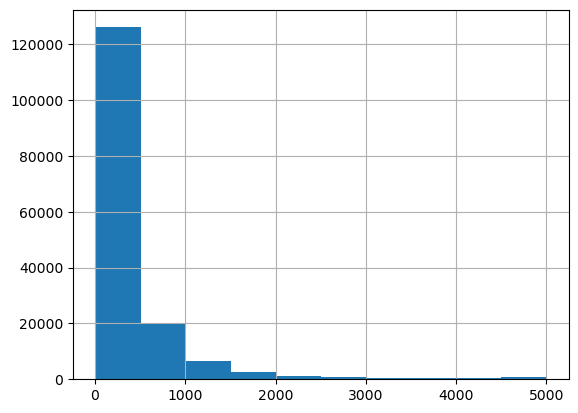

In [87]:
lens.hist()

In [88]:
x=tr.iloc[:,2:].sum() #grabs the sum of all the 'tags' and values that equal 1 for any of the toxicity classes
#marking comments without any tags as "clean"
x.index
rowsums=tr.iloc[:,2:].sum(axis=1) 
tr['noclass']=(rowsums==0) #labels the rows with all '0' for the toxicity as clean
rowsums=val_Y.iloc[:,1:].sum(axis=1) 
val_Y['noclass']=(rowsums==0) 
#count number of clean entries
tr['noclass'].sum()
print("Total comments = ",len(tr))
print("Total comments with no classes = ",tr['noclass'].sum())
print("Total tags =",x.sum())

Total comments =  159571
Total comments with no classes =  143346
Total tags = 35098


total number of occurances for toxic: 15294
total number of occurances for severe_toxic: 1595
total number of occurances for obscene: 8449
total number of occurances for threat: 478
total number of occurances for insult: 7877
total number of occurances for identity_hate: 1405
total number of occurances for noclass: 143346


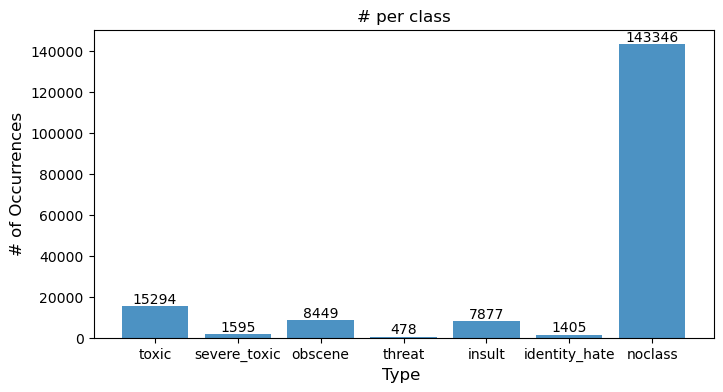

In [89]:
x=tr.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= plt.bar(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
l = []
i =0
for rect, label in zip(rects, labels):
    height = rect.get_height()
    print(f'total number of occurances for {x.index[i]}: {height}')
    l.append(height)
    i+= 1

plt.bar_label(ax, labels=l)

plt.show()

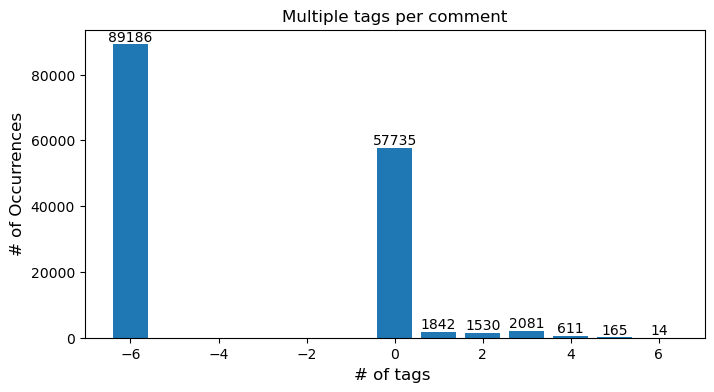

In [90]:
x=rowsums.value_counts()

#plot
plt.figure(figsize=(8,4))
ax = plt.bar(x.index, x.values)
plt.title("Multiple tags per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of tags ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
l = []
for rect, label in zip(rects, labels):
    height = rect.get_height()
    l.append(height)
    
plt.bar_label(ax, labels=l)

plt.show()

In [91]:
print("invalid rows:", len(val_Y[val_Y["toxic"] == -1]))
print("total rows:", len(val_Y))

invalid rows: 89186
total rows: 153164


In [92]:
feature_column = val_Y.iloc[:, 1]
val_X = val_X[feature_column != -1]
val_Y = val_Y[feature_column != -1]

In [93]:
#explain that we visualized our data and at first glance we saw that there is a lot of clean data (data representation)

In [94]:
#discuss the graph and explain how a comment can have  multiple tags and different types of toxicity 

In [95]:
#show the number of unique words over total words (illustrate the point that the bag of words will be sparse)

In [96]:
import re, string
seen = set()
def clean_text(text):
   text = text.lower()
   text = re.sub(r"what's", "what is ", text)
   text = re.sub(r"'s", " ", text)
   text = re.sub(r"'ve", " have ", text)
   text = re.sub(r"can't", "cannot ", text)
   text = re.sub(r"n't", " not ", text)
   text = re.sub(r"i'm", "i am ", text)
   text = re.sub(r"'re", " are ", text)
   text = re.sub(r"'d", " would ", text)
   text = re.sub(r"'ll", " will ", text)
   text = re.sub(r"'scuse", " excuse ", text)
   text = re.sub('\W', ' ', text)
   text = re.sub('\s+', ' ', text)
   text = text.strip(' ')
   words = text.split()
   for i in words:
      seen.add(i)
   return words


In [97]:
from nltk.corpus import stopwords
from spellchecker import SpellChecker
stop_words = set(stopwords.words('english'))

tr['sentence_count']=tr["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

tr['word_count']=tr["comment_text"].apply(lambda x: len(str(x).split()))

tr['uniq_words']=tr["comment_text"].apply(lambda x: len(set(str(x).split())))

tr['letter_count']=tr["comment_text"].apply(lambda x: len(str(x)))

tr["punctuation"] =tr["comment_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

tr["capital_words"] = tr["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

tr["stopwords"] = tr["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

tr["avg_length"] = tr["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

#tr["typos"] = tr["comment_text"].apply(lambda x: len(list(SpellChecker().unknown(str(x).split()))))

val_X['sentence_count']=val_X["comment_text"].apply(lambda x: len(re.findall("\n",str(x)))+1)

val_X['word_count']=val_X["comment_text"].apply(lambda x: len(str(x).split()))

val_X['uniq_words']=val_X["comment_text"].apply(lambda x: len(set(str(x).split())))

val_X['letter_count']=val_X["comment_text"].apply(lambda x: len(str(x)))

val_X["punctuation"] =val_X["comment_text"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

val_X["capital_words"] = val_X["comment_text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

val_X["stopwords"] = val_X["comment_text"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

val_X["avg_length"] = val_X["comment_text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))


In [98]:
tr.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,noclass,sentence_count,word_count,uniq_words,letter_count,punctuation,capital_words,stopwords,avg_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True,2,43,41,264,10,2,18,5.162791
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True,1,17,17,112,12,1,2,5.588235
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True,1,42,39,233,6,0,20,4.571429
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True,5,113,82,622,21,5,56,4.486726
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True,1,13,13,67,5,0,5,4.230769


In [99]:
toxic_mean=tr.loc[tr['toxic'] == 1].iloc[:,9:].mean(axis=0)

severe_mean=tr.loc[tr['severe_toxic'] == 1].iloc[:,9:].mean(axis=0)

obscene_mean=tr.loc[tr['obscene'] == 1].iloc[:,9:].mean(axis=0)

threat_mean=tr.loc[tr['threat'] == 1].iloc[:,9:].mean(axis=0)

insult_mean = tr.loc[tr['insult'] == 1].iloc[:,9:].mean(axis=0)

ih_mean = tr.loc[tr['identity_hate'] == 1].iloc[:,9:].mean(axis=0)

noclass_mean =tr.loc[tr['noclass'] == 1].iloc[:,9:].mean(axis=0)




In [100]:
bad_mean = tr.loc[tr['noclass'] == False].iloc[:,9:].mean(axis=0)
good_mean = tr.loc[tr['noclass'] == True].iloc[:,9:].mean(axis=0)

Text(0.5, 1.0, 'Average Number of Average Lengths')

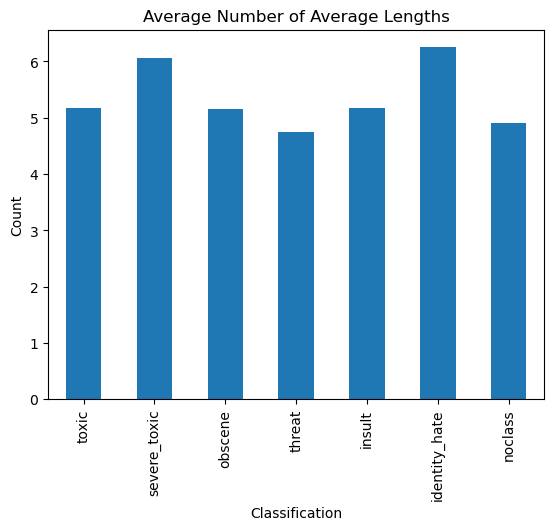

In [101]:
toxic_mean.index
all_df = pd.DataFrame({'toxic': toxic_mean,
                            'severe_toxic': severe_mean,
                            'obscene': obscene_mean,
                            'threat': threat_mean,
                            'insult': insult_mean,
                            'identity_hate': ih_mean,
                            'noclass': noclass_mean}, index=toxic_mean.index)
all_df.loc['sentence_count'].head()
x_df = pd.DataFrame({'sentence_count': all_df.loc['sentence_count'],
                        'word_count': all_df.loc['word_count'],
                        'uniq_words': all_df.loc['uniq_words'],
                        'letter_count': all_df.loc['letter_count'],
                        'punctuation': all_df.loc['punctuation'],
                        'capital_words': all_df.loc['capital_words'],
                        'stopwords': all_df.loc['stopwords'],
                        'avg_length': all_df.loc['avg_length']}, index=all_df.columns)
axes = x_df["avg_length"].plot.bar()
axes.set_xlabel("Classification")
axes.set_ylabel("Count")
axes.set_title("Average Number of Average Lengths")

In [102]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=clean_text, strip_accents='unicode')
tr_term_document_matrix = vectorizer.fit_transform(tr["comment_text"])
val_term_document_matrix = vectorizer.transform(val_X["comment_text"])

In [103]:
from scipy.sparse import csr_matrix, hstack
cols = ["sentence_count", "word_count",	"uniq_words", "letter_count", "punctuation", "capital_words", "stopwords", "avg_length"]
Xtr = hstack((tr_term_document_matrix,tr[cols])).tocsr()
Xva = hstack((val_term_document_matrix,val_X[cols])).tocsr()


In [104]:
from sklearn.linear_model import LogisticRegression
classes = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'noclass']
train_predictions = np.zeros((len(tr), len(classes)))
val_predictions = np.zeros((len(val_X), len(classes)))
for i, c in enumerate(classes):
    model = LogisticRegression().fit(Xtr, tr[c])
    train_predictions[:, i] = model.predict(Xtr)
    val_predictions[:, i] = model.predict(Xva)
    print("training error for " + c + ":", zero_one_loss(tr[c], train_predictions[:, i]))
    print("validation error for " + c + ":", zero_one_loss(val_Y[c], val_predictions[:, i]))

training error for toxic: 0.09013542560991661
validation error for toxic: 0.09417299696770765
training error for severe_toxic: 0.009525540355077022
validation error for severe_toxic: 0.005877020225702578
training error for obscene: 0.05198939656955215
validation error for obscene: 0.057441620557066475
training error for threat: 0.002964197755231268
validation error for threat: 0.003438682046953634
training error for insult: 0.045684992887178755
validation error for insult: 0.052486792334865084
training error for identity_hate: 0.008754723602659609
validation error for identity_hate: 0.011628997467879598
training error for noclass: 0.09269228117891093
validation error for noclass: 0.09715839819938099


In [105]:
print(val_predictions[val_predictions[:, 0] == 1])
print(val_Y[val_predictions[:, 0] == 1])

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
                      id  toxic  severe_toxic  obscene  threat  insult  \
286     007d75123ac09c87      0             0        0       0       0   
289     007e9c51523a40f2      0             0        0       0       0   
881     0173dd710621e443      1             0        1       0       1   
1036    01b85ab3638dc00c      0             0        0       0       0   
1071    01c75791e712fa9e      1             0        1       1       1   
...                  ...    ...           ...      ...     ...     ...   
152324  fe9315bad284186b      1             1        1       0       1   
152603  ff0c3a7fbb467c69      0             0        0       0       0   
152748  ff4ae0cb03e213ca      0             0        0       0       0   
152836  ff6fce734d8f8c8b      1             0        0       0       1   
153155  fffac2a094c8e0e2      

In [106]:
# features

from spellchecker import SpellChecker
